In [1]:
# getting the data
# !curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls --output CTG.xls

**SOURCE**		J Bernardes, Faculdade de Medicina, Universidade do Porto, Porto, Portugal
Reference: D Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318		
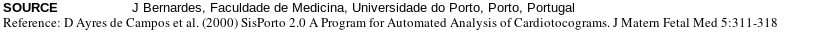

# First model 
Trying to run a model as fast as possible and getting a base line accuracy

In [2]:
import pandas as pd

xls = pd.ExcelFile('CTG.xls')
df = pd.read_excel(xls, 'Data', header=1)
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [3]:
df.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'Unnamed: 9', 'LB',
       'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'Unnamed: 31', 'A', 'B', 'C', 'D',
       'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'Unnamed: 42', 'CLASS',
       'Unnamed: 44', 'NSP'],
      dtype='object')

In [4]:
three_classes = ['NSP'] # 1, 2, 3
ten_classes = 'A, B, C, D, E, AD, DE, LD, FS, SUSP'.split(', ')

In [5]:
ten_classes

['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']

In [6]:
# the number of unnamed columns (empty ones in the excel sheet)
len([x for x in df.columns if 'Unnamed' in x])

4

In [7]:
# drop unnamed columns
unnamed = [x for x in df.columns if 'Unnamed' in x]
df.drop(unnamed, axis=1, inplace=True)

print(f"Droped {unnamed}")

Droped ['Unnamed: 9', 'Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44']


In [8]:
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0


In [10]:
df.isnull().sum()

b           3
e           3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
DR          1
LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           2
B           2
C           2
D           2
E           2
AD          2
DE          2
LD          2
FS          2
SUSP        2
CLASS       3
NSP         3
dtype: int64

In [11]:
# drop null rows
df.dropna(axis=0, inplace=True)

In [12]:
df.isna().sum()

b           0
e           0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
DR          0
LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [13]:
df.describe()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,0.0,133.303857,...,-0.950141,-0.923801,-0.932267,-0.687676,-0.762935,-0.899341,-0.935089,-0.814675,4.509878,1.304327
std,894.084748,930.919143,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,0.0,9.840844,...,0.311894,0.382964,0.361856,0.726188,0.646627,0.437350,0.354495,0.580054,3.026883,0.614377
min,0.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,106.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,55.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,126.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000
50%,538.000000,1241.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,133.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,1.000000
75%,1521.000000,2434.750000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.0,140.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000,1.000000
max,3296.000000,3599.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,0.0,160.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [14]:
# drop 10 classes columns and target
df.drop(ten_classes, axis=1, inplace=True)
df.drop(['CLASS'], axis=1, inplace=True)

In [15]:
# drop b,e and old features
old_features = df.columns[:9]
df.drop(old_features, axis=1, inplace=True)
old_features

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR'], dtype='object')

In [16]:
df.dtypes

LB          float64
AC.1        float64
FM.1        float64
UC.1        float64
DL.1        float64
DS.1        float64
DP.1        float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
df.iloc[:, :-1]

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

In [23]:
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1700, 21), (1700,)), ((426, 21), (426,)))

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf.oob_score_

0.9394117647058824

In [35]:
rf.score(x_train, y_train)

1.0

In [36]:
rf.score(x_valid, y_valid)

0.9460093896713615

In [91]:
rf = RandomForestClassifier(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [92]:
rf.oob_score_

0.9364705882352942

In [93]:
rf.score(x_train, y_train)

1.0

In [94]:
rf.score(x_valid, y_valid)

0.9507042253521126

# Actual 

In [485]:
# modules
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import balanced_accuracy_score

# metrics 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [287]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

### The Dataset - Cadiotocographics data
- The dataset is a collection of 2126 of **fetal heart rate (FHR) signals**.

- Why is the dataset interesting?
FHR and other types of data in Cardiotocography(CTG) are recoded during cases like pregnancy. But most of the time it is done **manually**, that may produce human errors. So automated way to understand and interpret these CTGs would be very beneftial

In [2]:
import pandas as pd

xls = pd.ExcelFile('CTG.xls')
df = pd.read_excel(xls, 'Data', header=1)
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [3]:
df.shape

(2129, 46)

**We have 3 more rows than expected, some statistic data is put at the end of the file**

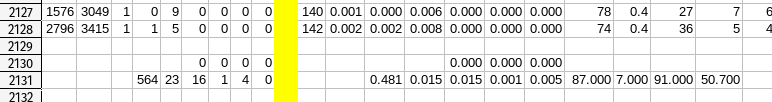

In [4]:
df.tail()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,564.0,23.0,16.0,1.0,4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop the last 3 rows
df = df.iloc[:-3, :]
if df.shape[0] == 2126:
    print(f'Correct number of rows: {df.shape[0]}')
df.tail()

Correct number of rows: 2126


,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0


In [6]:
# Removing unnamed columns (Empty columns from the excel sheet)
unnamed_cols = [x for x in df.columns if 'Unnamed' in x]

# check if the columns are really empty
for col in unnamed_cols:
    assert df[col].sum() == 0, f'Column:{col} is not empty!!'

# drop unnamed columns
df.drop(unnamed_cols, axis=1, inplace=True)

print(f"Droped #{len(unnamed_cols)} columns.")

Droped #4 columns.


In [7]:
# Target Columns 
three_classes_target = ['NSP'] # 1, 2, 3
ten_classes = 'A, B, C, D, E, AD, DE, LD, FS, SUSP'.split(', ')
ten_classes_target = 'CLASS'

We are working on the 3 classes probelm (**NSP**)

In [8]:
# drop 10 classes columns and target
df.drop(ten_classes, axis=1, inplace=True)
df.drop(['CLASS'], axis=1, inplace=True)

**Droping Old Features**

**b**: The start of the instant

**e**: The end of the instant

**DR**: was always 0, so it will not make a difference

The features **['AC', 'FM', 'UC', 'DL', 'DS', 'DP']** are calculated by dividing them by `e-b` and put in new columns with the same name, so we drop the old ones.

In [9]:
# drop b,e and old features
old_features = df.columns[:9]
df.drop(old_features, axis=1, inplace=True)
print(f"The dropped Features: \n{old_features}")

The dropped Features: 
Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR'], dtype='object')


In [10]:
df.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### **Types of features, categorical vs continuous**

In [11]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [12]:
# Number of unique values per feature if unique <= 10
for col in df.columns:
    if df[col].nunique() <= 10:
        print(f"Column: {col}: {df[col].nunique()} unique values")
        print(pd.value_counts(df[col]))
        print('_'*10)

Column: DS.1: 8 unique values
0.000000    2119
0.001079       1
0.000948       1
0.001029       1
0.000890       1
0.001353       1
0.001178       1
0.001144       1
Name: DS.1, dtype: int64
__________
Column: Nzeros: 9 unique values
0.0     1624
1.0      366
2.0      108
3.0       21
5.0        2
4.0        2
7.0        1
8.0        1
10.0       1
Name: Nzeros, dtype: int64
__________
Column: Tendency: 3 unique values
 0.0    1115
 1.0     846
-1.0     165
Name: Tendency, dtype: int64
__________
Column: NSP: 3 unique values
1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64
__________


As ML algorithms will assume that 2 nearby values are more similiar than 2 distant values, **DS.1, Nzeros, Tendency** are in the right form and We don't need to change anything

**NSP**: is the target column

### Visualizing Dataset and Insights

#### Missing Values and Outliers
- The percentages of missing value

In [13]:
df.isnull().sum()

LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

**No Missing Values**

#### Checking the data for outliers 

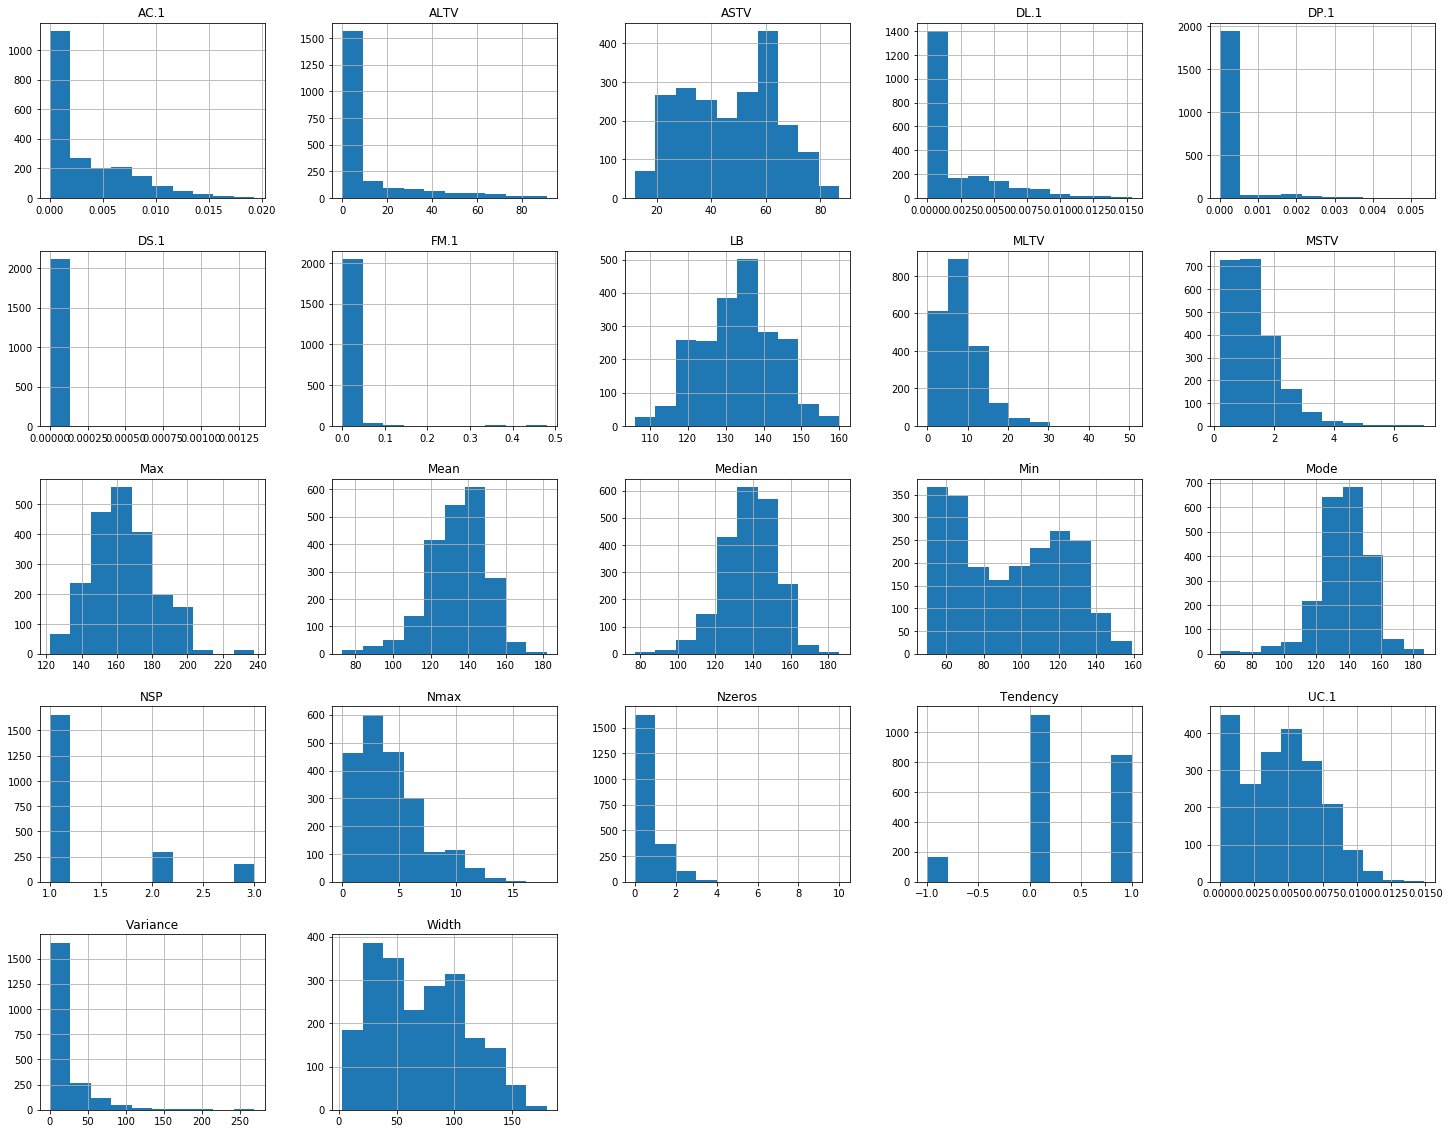

In [14]:
# Looking at the data
df.hist(figsize=(25, 20))
plt.show()

according to the plots, we suspected **Variance** and **Max** columns to have outliers.

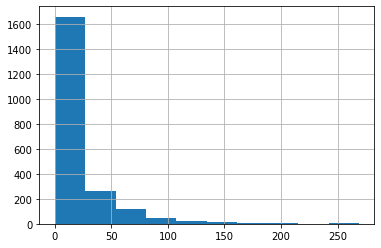

In [15]:
df['Variance'].hist()
plt.show()

In [16]:
pd.value_counts(df['Variance']>200)

False    2120
True        6
Name: Variance, dtype: int64

In [17]:
df[df['Variance'] > 200]

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
6,134.0,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
1905,130.0,0.001460,0.000000,0.011679,0.013139,0.0,0.000000,62.0,2.0,0.0,...,50.0,177.0,7.0,0.0,60.0,95.0,112.0,269.0,0.0,3.0
1906,130.0,0.001307,0.001307,0.011765,0.010458,0.0,0.001307,62.0,2.2,0.0,...,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
1907,130.0,0.001548,0.001548,0.009288,0.009288,0.0,0.001548,63.0,2.3,0.0,...,50.0,211.0,5.0,0.0,60.0,88.0,113.0,254.0,-1.0,3.0
1908,130.0,0.001695,0.001695,0.008475,0.008475,0.0,0.001695,64.0,2.4,0.0,...,50.0,211.0,8.0,0.0,60.0,85.0,112.0,243.0,-1.0,3.0
1909,130.0,0.001931,0.001931,0.007722,0.007722,0.0,0.001931,64.0,2.5,0.0,...,50.0,211.0,7.0,0.0,60.0,83.0,114.0,241.0,-1.0,3.0


According to the plot and the count of rows in the **Variance** column, We only have **6** points that are considered extreme but looking at the data they look somehow normal and all of them has the same target class which means they are more of extreme cases than being outliers. We can still make sure when we train the models and see if removing them will make a difference on the **validation accuracy**

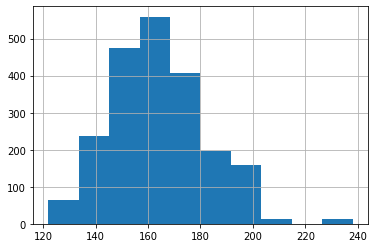

In [18]:
df['Max'].hist()
plt.show()

In [19]:
pd.value_counts(df['Max']>220)

False    2112
True       14
Name: Max, dtype: int64

In [20]:
df[df['Max']>220]

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1674,110.0,0.002629,0.000000,0.006135,0.003506,0.0,0.000000,64.0,1.7,0.0,...,62.0,238.0,13.0,1.0,107.0,103.0,107.0,35.0,-1.0,1.0
1676,110.0,0.003264,0.000000,0.006529,0.004353,0.0,0.000000,63.0,2.4,0.0,...,62.0,238.0,10.0,1.0,98.0,101.0,105.0,59.0,-1.0,1.0
1677,110.0,0.003788,0.000000,0.009470,0.004735,0.0,0.000000,63.0,2.7,0.0,...,62.0,238.0,9.0,0.0,95.0,98.0,106.0,61.0,-1.0,1.0
1678,110.0,0.002757,0.000000,0.007581,0.004135,0.0,0.000000,64.0,2.1,0.0,...,62.0,238.0,10.0,0.0,107.0,101.0,108.0,33.0,-1.0,1.0
1679,110.0,0.004342,0.000620,0.008685,0.003722,0.0,0.000000,64.0,2.2,0.0,...,62.0,238.0,7.0,0.0,107.0,103.0,109.0,42.0,-1.0,1.0
1680,110.0,0.003538,0.000590,0.009434,0.002948,0.0,0.000000,64.0,1.8,0.0,...,62.0,238.0,7.0,0.0,110.0,106.0,110.0,36.0,-1.0,1.0
1920,140.0,0.002613,0.000871,0.006969,0.005226,0.0,0.000000,63.0,1.5,0.0,...,75.0,228.0,9.0,0.0,142.0,120.0,142.0,22.0,0.0,1.0
1921,140.0,0.001923,0.002885,0.005769,0.005769,0.0,0.000000,62.0,1.6,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,1.0
1922,140.0,0.001764,0.001764,0.004409,0.005291,0.0,0.000000,63.0,1.3,1.0,...,75.0,228.0,7.0,0.0,142.0,121.0,143.0,17.0,0.0,1.0
1923,140.0,0.000923,0.001845,0.005535,0.005535,0.0,0.000000,63.0,1.5,1.0,...,65.0,228.0,5.0,1.0,142.0,118.0,141.0,27.0,0.0,1.0


Same goes with **Max**, we should also keep in mind that **Variance** and **Max** both are features of a **Histogram** data which means they can go high sometimes

###  Other Plots and Insights 

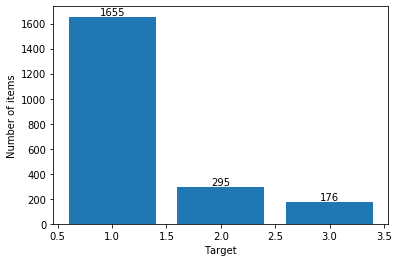

In [21]:
# The Target Class
nsp_counts = pd.DataFrame(pd.value_counts(df['NSP']))['NSP'].to_numpy()
nsp_labels = pd.DataFrame(pd.value_counts(df['NSP'])).index

line = plt.bar(nsp_labels, nsp_counts)
plt.xlabel('Target')
plt.ylabel("Number of items")

for i in range(len(nsp_counts)):
    plt.annotate(str(nsp_counts[i]), xy=(nsp_labels[i], nsp_counts[i]), ha='center', va='bottom')

plt.show()

**We have 3 classes and clearly they are unbalanced**

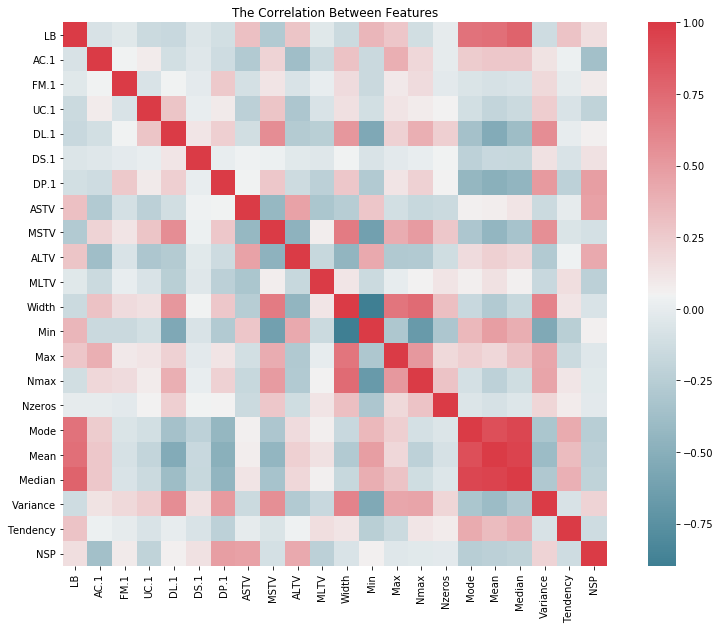

In [22]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

In [23]:
labels =pd.DataFrame(corr['NSP'].sort_values(ascending=False)).index[1:]
values = pd.DataFrame(corr['NSP'].sort_values(ascending=False))['NSP'].to_numpy()[1:]

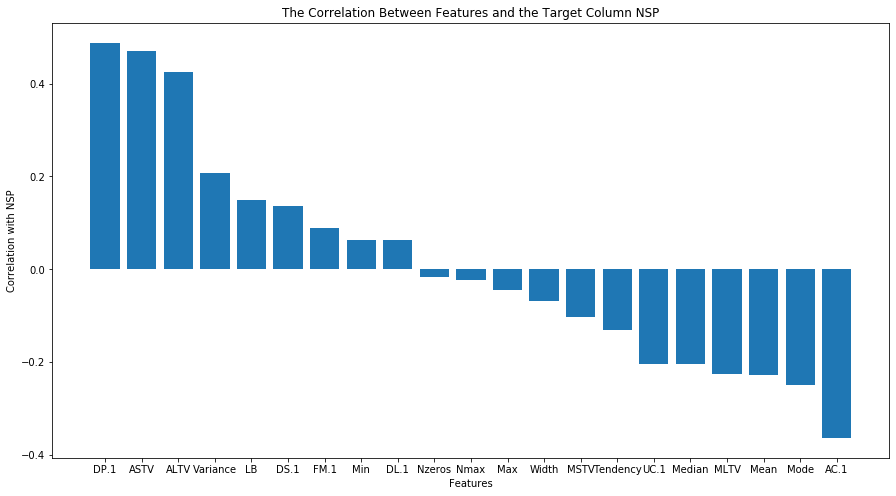

In [24]:
plt.figure(figsize=(15, 8))
line = plt.bar(labels, values)
plt.xlabel('Features')
plt.ylabel('Correlation with NSP')
plt.title('The Correlation Between Features and the Target Column NSP')
plt.show()

There is some *possitive correlation* between the target column **NSP** and other columns like **ALTV, ASTV, DP.1**
and *negative correlation* with **AC.1**. We can check the importance of these features using the *feature importance of RandomForest* later

#### Feature Scalling  
The reason for using **StandardScaler** and not **MinMaxScaler** is that **MinMaxScaler** is more affected by outliers (Extreme values)

In [513]:
#input the modified df
#output the data splits ready to model
def prepare_df(df, verbose=True):
    # getting the features and targets
    x = df.iloc[:, :-1]
    y = df['NSP']
    
    # using stratify to handle unbalanced classes while splitting the data
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
    
    if verbose:
        print('----- Data Splits Summary -----')
        print(f'train size: {x_train.shape[0]} | valid size: {x_valid.shape[0]}')

        # percentage of each class in train and valid
        print('\nPercentage of classes in the train dataset:')
        target_classes = [1., 2., 3.]
        for i in target_classes:
            print(f'Class {i}: {(y_train==i).sum()/y_train.shape[0]:.3f}')

        print('\nPercentage of classes in the valid dataset:')
        for i in target_classes:
            print(f'Class {i}: {(y_valid==i).sum()/y_valid.shape[0]:.3f}')
        
    return x_train, y_train, x_valid, y_valid

In [408]:
# We need to fit the Scaler to training data only and then transform the validation
# so we need to split the data first
x_train, y_train, x_valid, y_valid = prepare_df(df)

----- Data Splits Summary -----
train size: 1700 | valid size: 426

Percentage of classes in the train dataset:
Class 1.0: 0.778
Class 2.0: 0.139
Class 3.0: 0.083

Percentage of classes in the valid dataset:
Class 1.0: 0.779
Class 2.0: 0.138
Class 3.0: 0.082


As our data is unbalanced splitting it randomly between the training and validation dataset could lead to unbalanced training or validation dataset. The training set could have more values from one class (mostly the dominating one) so the model will learn to output this class more.

To avoid this we use **Stratify** so our training and dataset have equal percentages of different target classes

In [409]:
# Scaling the data
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

## Modeling 
Models I will be using
- RandomForest
- KNearestNeighbours
- Stocastic Gradient Descent
 - Support Vector Machine

In [410]:
# helper functions for RandomForests
# puts the feature importance of RandomForest in a DataFrame
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns[:-1], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# Plots the feature importance using the DataFrame
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [432]:
# fit_model
# takes a model and datasets as input and outputs the scores
def fit_model(model, x_train, y_train, x_valid, y_valid):
    # fitting the model
    model.fit(x_train, y_train)
    
    # Scores
    train_score = model.score(x_train, y_train)
    y_pred = model.predict(x_valid)
    valid_score = accuracy_score(y_pred, y_valid)
    conf_mx = confusion_matrix(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average='weighted')
    recall = recall_score(y_valid, y_pred, average='weighted')
    f1 = f1_score(y_valid, y_pred, average='weighted')
    balanced = balanced_accuracy_score(y_valid, y_pred)
    
    print('----- Model Scores -----')
    print(f"train score: {train_score:.4f} | valid score: {valid_score:.4f}")
    print(f"precision  : {precision:.4f} | recall     : {recall:.4f}")
    print(f"f1 score   : {f1:.4f} | balanced   : {balanced:.4f}")
    plot_confusion_matrix(model, x_valid, y_valid, display_labels=['Normal', 'Suspect', 'Pathologic'],
                         values_format='')
    return model

### Random Forest Classifier 

----- Model Scores -----
train score: 0.9994 | valid score: 0.9319
precision  : 0.9297 | recall     : 0.9319
f1 score   : 0.9297 | balanced: 0.8493


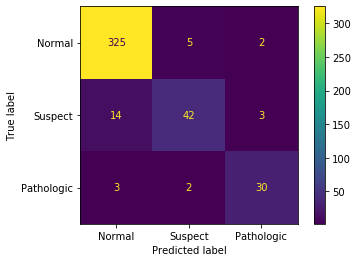

In [412]:
# trying the base model after removing the features
rf = RandomForestClassifier(random_state=42)
rf = fit_model(rf, x_train, y_train, x_valid, y_valid)

Here we get good scores on the validation set **0.9319** with very close **precision** and **recall** values.

We got a **balanced score of 84.9%** as the unbalanced data is *influencing the normal scores*. 

Also from the **Confusion Matrix** Most of our classes are predicted correctly. But some **Suspect** items are predicted as **Normal** as we know the model will be somehow baised towards the dominating class.
The model now will produce more **Normal** outputs and we don't need this as it will put people's lives into danger if it missclassified a patient as **normal** and he is **Suspect/Pathologic**

So we will have to fix it. We would prefere the model to have a **high recall** as we need it to classify more patients as **Suspect/Pathologic** instead of **Normal** even if it is not fully confident. In this case these scans can be rexamined by doctors and make sure that they are correctly classified.

#### Choosing the best parameters for Random Forest Classifier 
- `n_estimators`: The number of trees
- `max_features`: How to calculate the number of features to use

In [413]:
clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="log2",
                               random_state=42)),
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=42))
]

In [414]:
error_rate = dict((label, []) for label, _ in clfs)
min_estimators = 15
max_estimators = 175

In [415]:
def calc_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [416]:
start_time = time.time()
for label, clf in clfs:
    for i in range(min_estimators, max_estimators+1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)
        
        oob_error = clf.oob_score_
        error_rate[label].append((i, oob_error))

end_time = time.time()
mins, secs = calc_time(start_time, end_time)

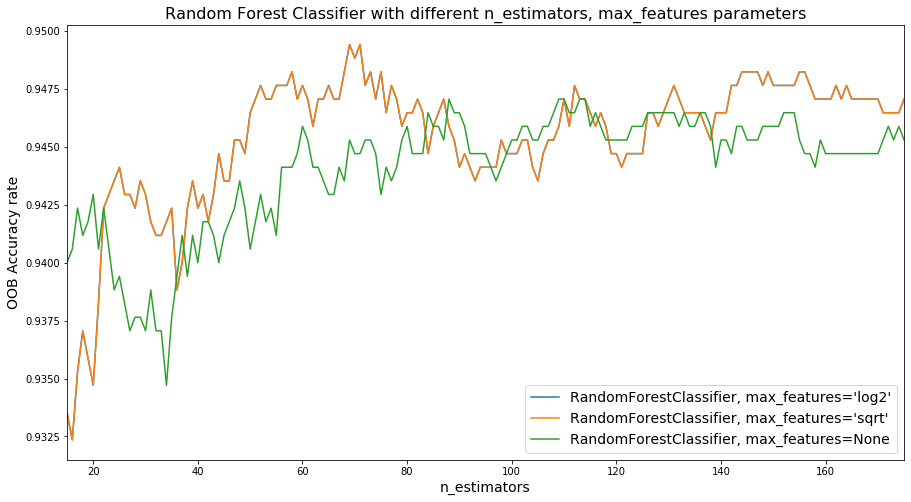

Time taken: 0m25s


,Best Score,n_estimator
"RandomForestClassifier, max_features='log2'",0.949412,69
"RandomForestClassifier, max_features='sqrt'",0.949412,69
"RandomForestClassifier, max_features=None",0.947059,88


In [420]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
best_rf_parameters = dict()

plt.figure(figsize=(15, 8))
for label, clf_err in error_rate.items():
    # plotting the data
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
    # getting the best n_estimator per max_feature parameter
    best_rf_parameters[label] = (np.array(ys).max(), xs[np.array(ys).argmax()])
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize=14)
plt.ylabel("OOB Accuracy rate", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.title('Random Forest Classifier with different n_estimators, max_features parameters', fontsize=16)
plt.show()
# other info
print(f'Time taken: {mins}m{secs}s')
pd.DataFrame.from_dict(best_rf_parameters, orient='index', columns=['Best Score', 'n_estimator'])

The plot shows that with only using a subset of the features `('log2', 'sqrt')`, we can get better results than using **all the features** and with fewver `n_estimators` or trees.

The plot also shows that `('log2','sqrt')` peformed really similar with the number of features we have **21**.

Finally, I put the best parameters in Dataframe so I can know the exact number of `n_estimators` performed best.

----- Model Scores -----
train score: 0.9994 | valid score: 0.9343
precision  : 0.9323 | recall     : 0.9343
f1 score   : 0.9319 | balanced: 0.8503


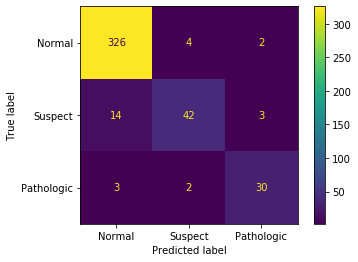

In [421]:
# testing the model with the new parameters
rf = RandomForestClassifier(n_estimators=69, max_features='sqrt', random_state=42)
rf = fit_model(rf, x_train, y_train, x_valid, y_valid)

Using the **Best Parameters** till now, we got a very minor improve in our normal scores.

and our **Balanced score became 85.03%**

#### Feature Importance of Random Forest

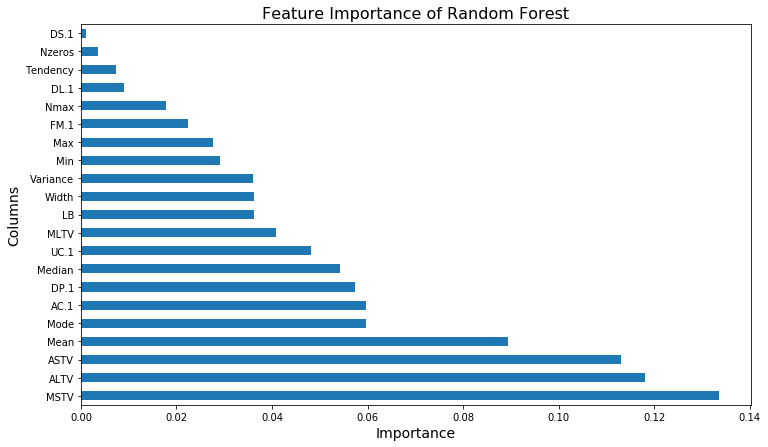

In [422]:
fi = rf_feat_importance(rf, df)
plot_fi(fi)
plt.title('Feature Importance of Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.show()

In [423]:
# features with imp > 0.005
fi[fi.imp>0.005]

,cols,imp
8,MSTV,0.133465
9,ALTV,0.118040
7,ASTV,0.113124
17,Mean,0.089455
16,Mode,0.059604
1,AC.1,0.059562
6,DP.1,0.057386
18,Median,0.054224
3,UC.1,0.048156
10,MLTV,0.040806


The plot shows the **importance(influence)** of each feature on the decision making of RandomForest.

This is considered to be **better than the Correlation matrix**, as the Correlation matrix only shows the **linear correlations** while The feature importance shows **linear and non-linear**.

#### Removing Low Importance Features

In [424]:
# keeping features with importance higher than 0.01
keep_cols = fi[fi.imp>0.005].cols.to_numpy()

# Adding the Target Column
keep_cols = np.append(keep_cols, ['NSP'])

In [425]:
# getting the new splits
new_df = df[keep_cols]
x_train, y_train, x_valid, y_valid = prepare_df(new_df)

----- Data Splits Summary -----
train size: 1700 | valid size: 426

Percentage of classes in the train dataset:
Class 1.0: 0.778
Class 2.0: 0.139
Class 3.0: 0.083

Percentage of classes in the valid dataset:
Class 1.0: 0.779
Class 2.0: 0.138
Class 3.0: 0.082


In [426]:
x_train.shape, x_valid.shape

((1700, 19), (426, 19))

----- Model Scores -----
train score: 0.9994 | valid score: 0.9343
precision  : 0.9320 | recall     : 0.9343
f1 score   : 0.9326 | balanced   : 0.8550


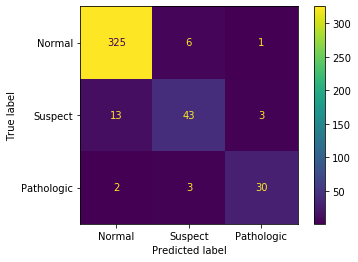

In [433]:
# The model after removing non-important features
rf = RandomForestClassifier(n_estimators=69, max_features='sqrt', random_state=42)
rf = fit_model(rf, x_train, y_train, x_valid, y_valid)

After removing the features with the lowest importance, the scores are mostly the same. But we got a **slightly lower precision score** but that is a good thing as we got less **Suspect** items missclassified as **Normal**

And our **Balanced Score became 85.5%** up by 1.5% from the original score

#### Learning Curves for Random Forest Classifier 

In [482]:
train_pcts = np.arange(.1, 1.1, .1)
train_sizes_rf, train_scores_rf, valid_scores_rf, *_ = learning_curve(rf, x_train, y_train, train_sizes=train_pcts)

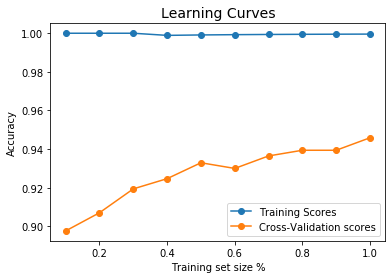

In [483]:
plt.plot(train_pcts, train_scores_rf.mean(axis=1), 'o-')
plt.plot(train_pcts, valid_scores_rf.mean(axis=1), 'o-')
plt.title('Learning Curves', fontsize=14)
plt.legend(['Training Scores', 'Cross-Validation scores'])
plt.xlabel('Training set size %')
plt.ylabel('Accuracy')
plt.show()

**Adding more data** helped the model **better generalize to the validation set.**

###  KNearestNeighbours Classifier

In [484]:
# get the data splits before removing any feature
x_train, y_train, x_valid, y_valid = prepare_df(df)

----- Data Splits Summary -----
train size: 1700 | valid size: 426

Percentage of classes in the train dataset:
Class 1.0: 0.778
Class 2.0: 0.139
Class 3.0: 0.083

Percentage of classes in the valid dataset:
Class 1.0: 0.779
Class 2.0: 0.138
Class 3.0: 0.082


----- Model Scores -----
train score: 0.9329 | valid score: 0.8944
precision  : 0.8894 | recall     : 0.8944
f1 score   : 0.8901 | balanced   : 0.7496


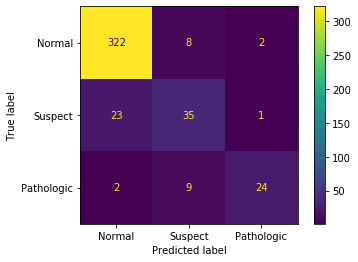

In [486]:
# The model after removing non-important features
knn = KNeighborsClassifier()
knn = fit_model(knn, x_train, y_train, x_valid, y_valid)

The results are **worse than Random Forest**

#### Finiding the best `n_neighbors` parameter

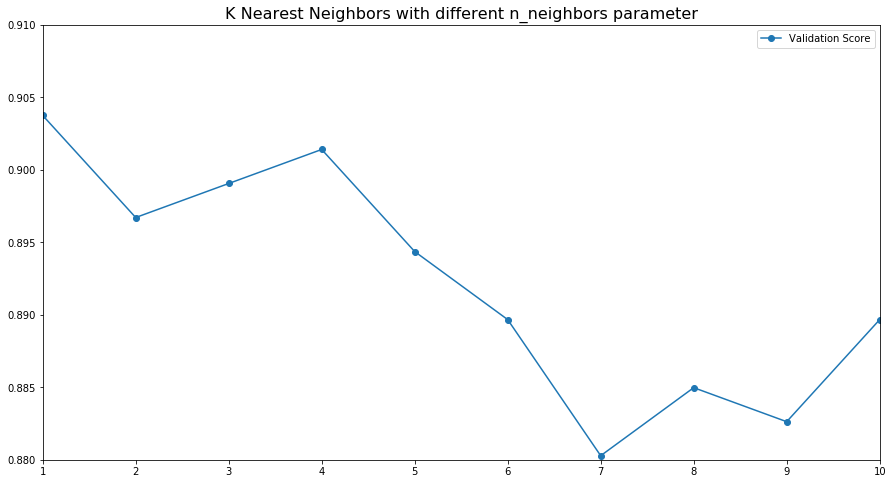

In [508]:
knn_scores = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_valid)
    knn_scores.append(accuracy_score(y_valid, y_pred))

plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), knn_scores, 'o-')
plt.xlim(1, 10)
plt.ylim(0.88, .91)
plt.title('K Nearest Neighbors with different n_neighbors parameter', fontsize=16)
plt.legend(['Validation Score'])
plt.show()


According to the plot the **best `n_neighbors` parameter is 1** so We will be using it.

----- Model Scores -----
train score: 0.9994 | valid score: 0.9038
precision  : 0.9035 | recall     : 0.9038
f1 score   : 0.9036 | balanced   : 0.8194


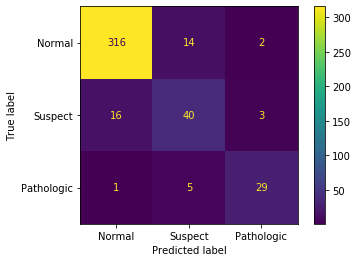

In [511]:
# using KNN with the best parameter
knn = KNeighborsClassifier(n_neighbors=1)
knn = fit_model(knn, x_train, y_train, x_valid, y_valid)

Using `n_neighbors=1` made a big improvement to our mode. **Valid Score: 89.4% -> 90**, **Balanced Score: 74.9% -> 81.9%**.

Now it is **close to** the results of the **Random Forest**

----- Model Scores -----
train score: 0.9994 | valid score: 0.9038
precision  : 0.9035 | recall     : 0.9038
f1 score   : 0.9036 | balanced   : 0.8194


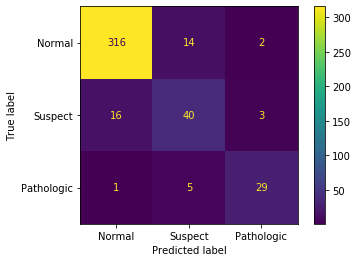

In [514]:
# using the KNN with the new df after removing less important features according to Random Forest
# getting the data
x_train, y_train, x_valid, y_valid = prepare_df(new_df, verbose=False)
# Running KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn = fit_model(knn, x_train, y_train, x_valid, y_valid)

It made **no difference** at all to **KNN**

#### Learning Curve for K Nearest Neighbors 

In [516]:
# getting the full data set
x_train, y_train, x_valid, y_valid = prepare_df(df, verbose=False)

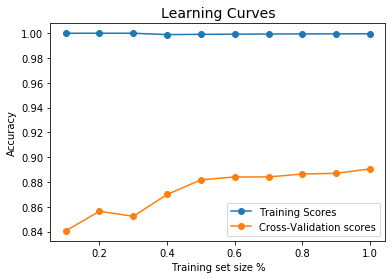

In [517]:
train_sizes_knn, train_scores_knn, valid_scores_knn, *_ = learning_curve(knn, x_train, y_train, train_sizes=train_pcts)

plt.plot(train_pcts, train_scores_knn.mean(axis=1), 'o-')
plt.plot(train_pcts, valid_scores_knn.mean(axis=1), 'o-')
plt.title('Learning Curves', fontsize=14)
plt.legend(['Training Scores', 'Cross-Validation scores'])
plt.xlabel('Training set size %')
plt.ylabel('Accuracy')
plt.show()

Same as for Random Forest, Adding more data helps the model better generalize